<a href="https://colab.research.google.com/github/pksnj/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation: https://facebook.github.io/prophet/
Credits: https://www.youtube.com/watch?v=KvLG1uTC-KU

In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies


In [10]:
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 81 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 2.18.0.0
    Uninstalling pystan-2.18.0.0:
      Successfully uninstalled pystan-2.18.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [12]:
df = pd.read_csv('dataset.csv')

In [14]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [16]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [15]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


# 2. Train Model

In [17]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3. Forecast Away

In [18]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,742.242694,3975.205584,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,911.293327,4023.494278,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,852.415311,3969.250027,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,801.321498,4179.916487,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,919.405231,4027.668973,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


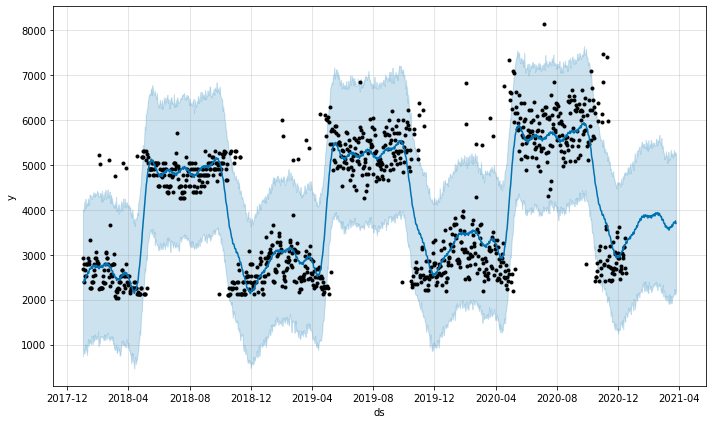

In [19]:
plot1 = m.plot(forecast)

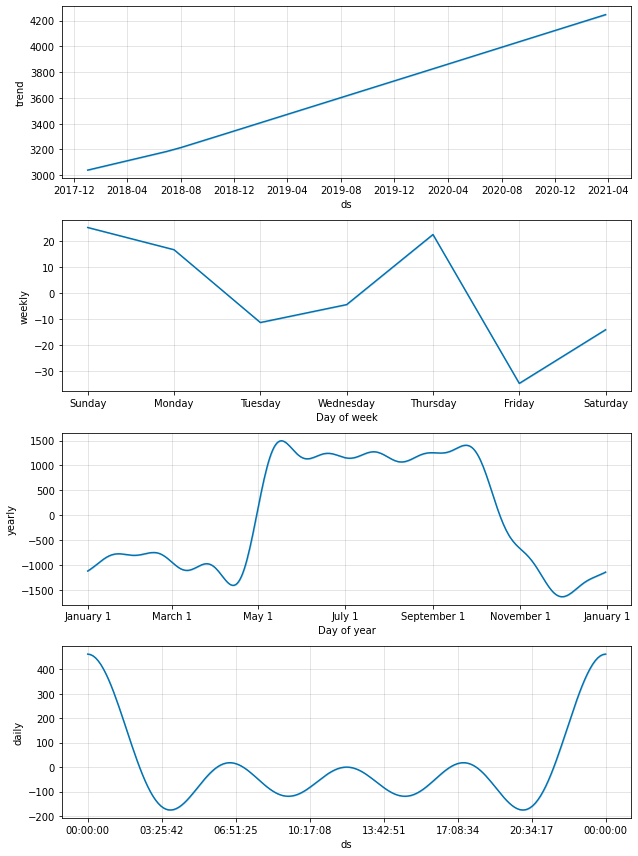

In [20]:
plt2 = m.plot_components(forecast)

# 4. Air passangers data

In [124]:
#ap = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True)
ap = pd.read_csv('AirPassengers.csv')
ap['Month'] = pd.to_datetime(ap['Month'], infer_datetime_format=True)
ap

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [125]:
# make a copy for eda. Keep 'ap' for Prophet
dat = pd.read_csv('AirPassengers.csv')
dat['Month'] = pd.to_datetime(dat['Month'], infer_datetime_format=True)  
dat

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# 4a. EDA

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

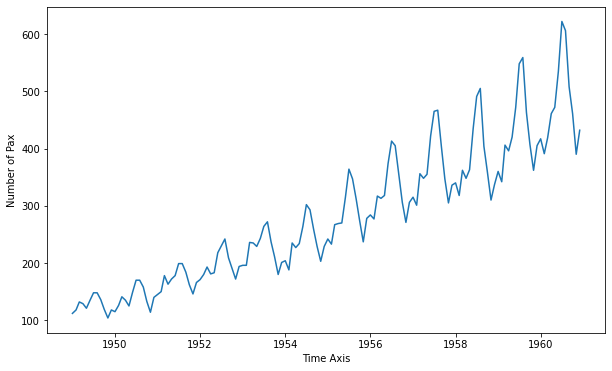

In [128]:
## plot
plt.xlabel("Time Axis")
plt.ylabel("Number of Pax")
ixap = dat.set_index(['Month'])
#ixap
plt.plot(ixap)

In [129]:
dat

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [135]:
#check the datatypes, spcially the date field
dat.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [134]:
dat.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [132]:
#check unique values
print(dat['#Passengers'].unique())

[112 118 132 129 121 135 148 136 119 104 115 126 141 125 149 170 158 133
 114 140 145 150 178 163 172 199 184 162 146 166 171 180 193 181 183 218
 230 242 209 191 194 196 236 235 229 243 264 272 237 211 201 204 188 227
 234 302 293 259 203 233 267 269 270 315 364 347 312 274 278 284 277 317
 313 318 374 413 405 355 306 271 301 356 348 422 465 467 404 305 336 340
 362 363 435 491 505 359 310 337 360 342 406 396 420 472 548 559 463 407
 417 391 419 461 535 622 606 508 390 432]


In [136]:
# Preapre data for Prophet.
ap.columns = ['ds', 'y']   ## prophet reuires these and only these 2
ap

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [142]:
#mp = Prophet(interval_width=0.95, daily_seasonality=True)
#m = Prophet(interval_width=0.95, weekly_seasonality=False, seasonality_mode='multiplicative')
m = Prophet(weekly_seasonality=False)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#m.add_country_holidays(country_name='US')


In [143]:
model = m.fit(ap)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
future = m.make_future_dataframe(periods=12, freq='M') ##, include_history=True)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,570.158849,652.157887,706.440114,570.158826,570.158864,110.838122,110.838122,110.838122,41.925363,41.925363,41.925363,68.912759,68.912759,68.912759,0.0,0.0,0.0,680.996971
152,1961-08-31,573.183977,573.416423,625.829887,573.183949,573.183996,25.720003,25.720003,25.720003,8.034892,8.034892,8.034892,17.685111,17.685111,17.685111,0.0,0.0,0.0,598.903980
153,1961-09-30,576.111520,567.244071,620.656341,576.111486,576.111543,18.058247,18.058247,18.058247,41.925363,41.925363,41.925363,-23.867116,-23.867116,-23.867116,0.0,0.0,0.0,594.169767
154,1961-10-31,579.136648,498.583953,554.142650,579.136610,579.136675,-51.945655,-51.945655,-51.945655,8.034892,8.034892,8.034892,-59.980547,-59.980547,-59.980547,0.0,0.0,0.0,527.190993
155,1961-11-30,582.064191,564.756429,619.649294,582.064148,582.064222,8.988978,8.988978,8.988978,41.925363,41.925363,41.925363,-32.936385,-32.936385,-32.936385,0.0,0.0,0.0,591.053170


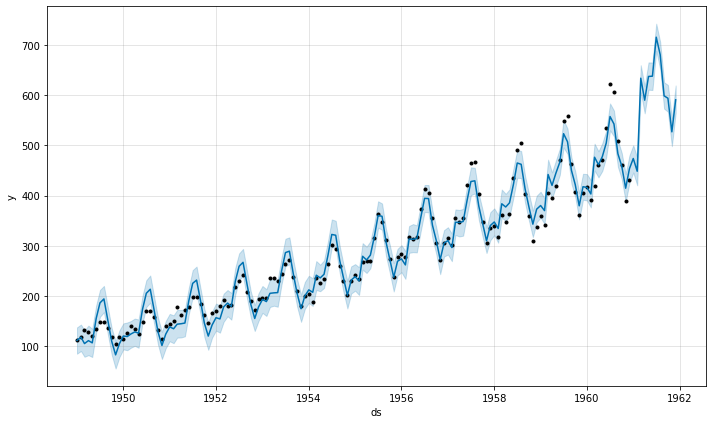

In [147]:
plot2 = m.plot(forecast)

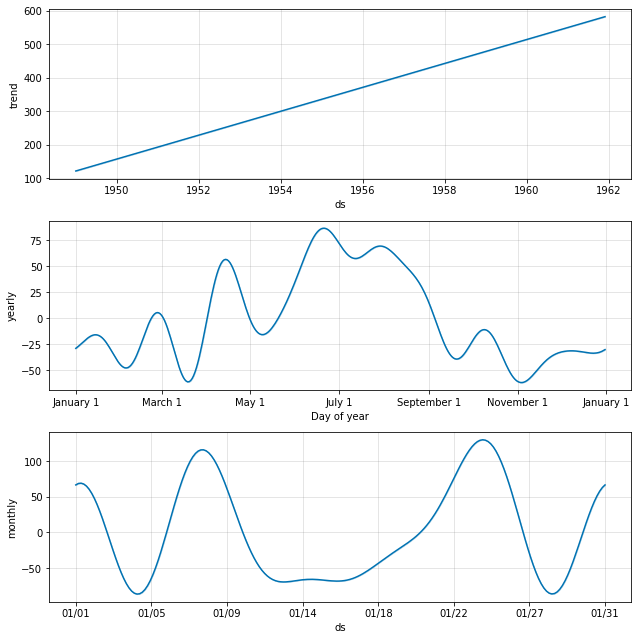

In [148]:
fig = m.plot_components(forecast)